In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, portfolio_return
from markowitz.optimize import perform_opt

### Download the ticker data

In [2]:
exp_ratio = {
    'VDIPX': 0.04,
    'VEMRX': 0.08,
    'VTIFX': 0.07,
    'RGAGX': 0.3,
    'CRISX': 0.93,
    'DODGX': 0.52,
    'MWTSX': 0.38,
    'TISCX': 0.18,
    'VGSNX': 0.1,
    'VWIAX': 0.16
}

In [3]:
sd = "2016-01-01"
ed = pd.to_datetime('now').floor('d').strftime('%Y-%m-%d')
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  10 of 10 completed


In [4]:
print(df.shape)
display(df.head(3))

(1330, 21)


,Date,VDIPX,VEMRX,VTIFX,RGAGX,CRISX,DODGX,MWTSX,TISCX,VGSNX,...,VDIPX-ret,VEMRX-ret,VTIFX-ret,RGAGX-ret,CRISX-ret,DODGX-ret,MWTSX-ret,TISCX-ret,VGSNX-ret,VWIAX-ret
0,2016-01-04,18.150000,67.080002,31.740000,40.520000,16.639999,160.539993,10.01,15.29,17.260000,...,0.998347,1.000745,1.001260,0.999013,1.001202,0.998131,1.000000,1.002616,1.020278,1.001352
1,2016-01-05,18.120001,67.129997,31.780001,40.480000,16.660000,160.240005,10.01,15.33,17.610001,...,0.985099,0.986593,1.001888,0.987401,0.990396,0.983587,1.002997,0.985649,0.996593,0.997469
2,2016-01-06,17.850000,66.230003,31.840000,39.970001,16.500000,157.610001,10.04,15.11,17.549999,...,0.983193,0.967235,0.999058,0.974231,0.975152,0.974621,1.000000,0.976837,0.980627,0.992725


In [5]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        print(c, 'all_good')
    else:
        print(c, 'missing_data. deleting the column')
        df = df.drop(columns=c)

Date all_good
VDIPX all_good
VEMRX all_good
VTIFX all_good
RGAGX all_good
CRISX all_good
DODGX all_good
MWTSX all_good
TISCX all_good
VGSNX all_good
VWIAX all_good
VDIPX-ret all_good
VEMRX-ret all_good
VTIFX-ret all_good
RGAGX-ret all_good
CRISX-ret all_good
DODGX-ret all_good
MWTSX-ret all_good
TISCX-ret all_good
VGSNX-ret all_good
VWIAX-ret all_good


### Simulate and visualize

In [6]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, ndays=180, nscenarios=600)
print(rdf.shape)
rdf.head()

(600, 10)


,VDIPX,VEMRX,VTIFX,RGAGX,CRISX,DODGX,MWTSX,TISCX,VGSNX,VWIAX
0,0.001607,0.001724,-4.599140e-06,0.001730,0.000698,0.001302,0.000160,0.001397,0.002185,0.000400
1,0.000169,0.000291,8.234145e-05,0.000438,-0.000294,0.000625,-0.000187,0.000072,-0.000491,-0.000056
2,0.001016,0.001190,5.610321e-07,0.002656,0.001275,0.001899,0.000094,0.001970,-0.000157,0.000208
3,-0.000693,-0.000276,-1.165413e-04,-0.000895,-0.002162,-0.001066,-0.000199,-0.000648,-0.001435,-0.000438
4,0.000392,-0.000142,1.564273e-04,0.001743,-0.001124,0.000080,0.000137,0.001454,-0.000176,0.000259


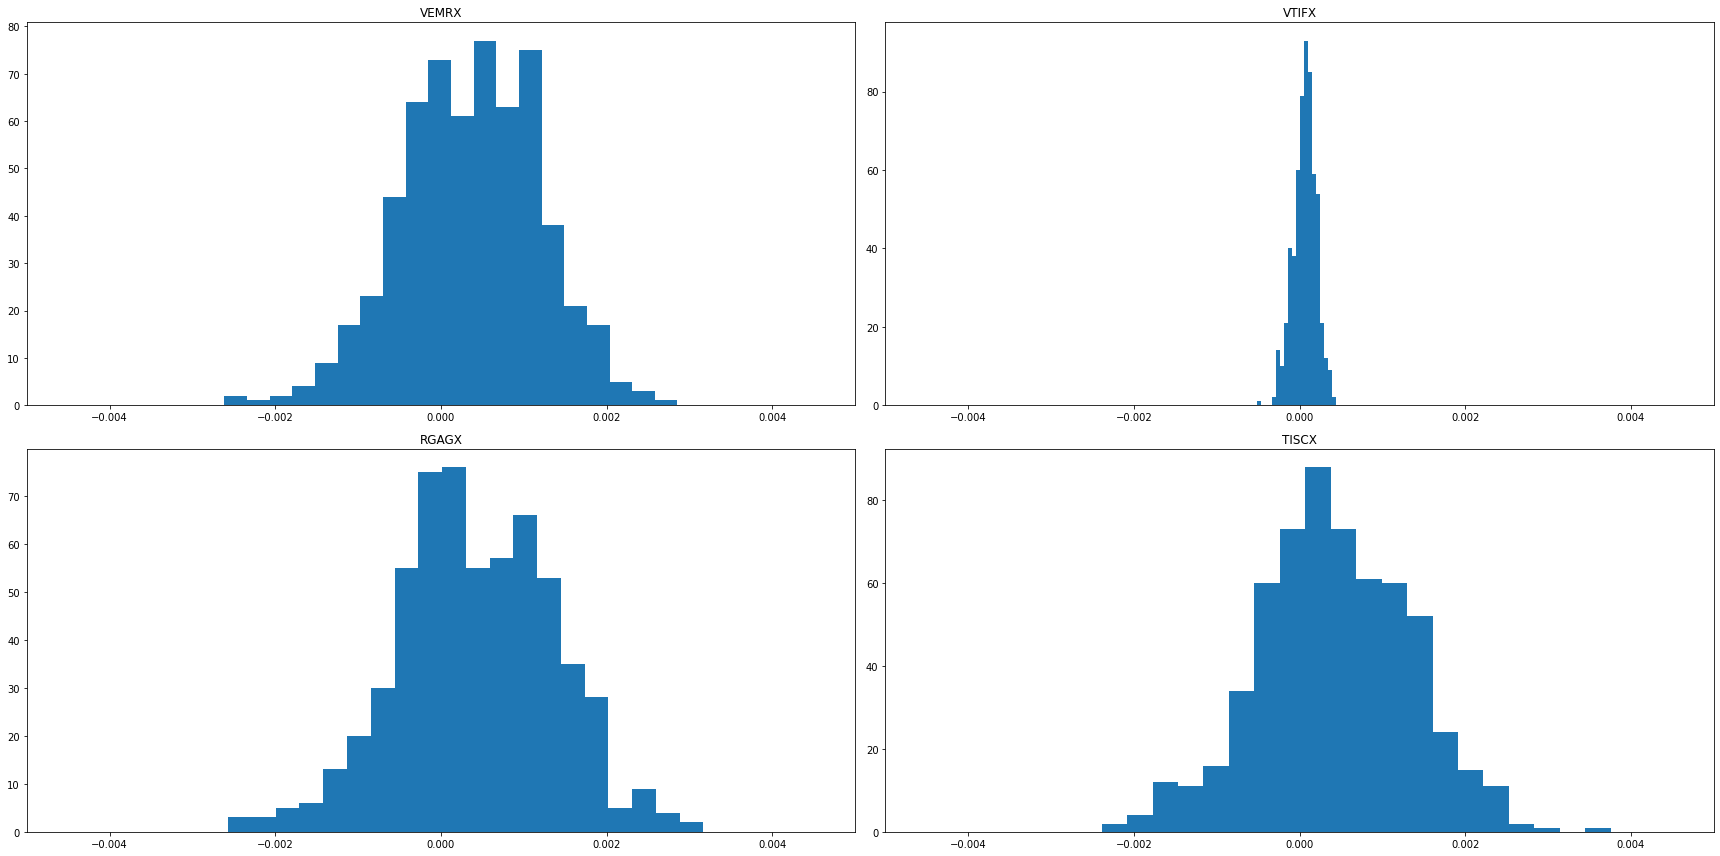

In [7]:
assets = ["VEMRX","VTIFX","RGAGX","TISCX"]

fig = plt.figure(figsize=(24, 12))
ctr = 0
for i in range(len(assets)):
    plt.subplot(2,2,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-0.005,0.005])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [8]:
for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    resdf = perform_opt(rdf, exp_ratio)
    print('\n'+str(ndays))
    display(resdf)

/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



15


,VEMRX,TISCX,VWIAX,return,risk
0,0.000000,0.366813,0.00000,0.020679,0.000364
1,0.000000,0.315359,0.00000,0.018465,0.000315
2,0.000000,0.257596,0.00000,0.015981,0.000265
3,0.000000,0.193109,0.00000,0.013207,0.000214
4,0.000000,0.109095,0.00000,0.009593,0.000162
5,28.980273,0.000000,116.32697,1.522486,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



30


,VEMRX,VTIFX,TISCX,VWIAX,return,risk
0,0.192908,0.362519,0.434574,0.01,0.028855,0.000364
1,0.160496,0.448888,0.380616,0.01,0.025709,0.000315
2,0.000000,0.587555,0.412445,0.00,0.022104,0.000265
3,0.000000,0.673110,0.326890,0.00,0.018661,0.000214
4,0.000000,0.766603,0.233397,0.00,0.014899,0.000162
5,0.000000,0.892408,0.107592,0.00,0.009836,0.000109


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



60


,VEMRX,VTIFX,TISCX,VWIAX,return,risk
0,0.000000,0.176431,0.823569,0.00,0.035478,0.000364
1,0.000000,0.281776,0.718224,0.00,0.031708,0.000315
2,0.193368,0.319344,0.477288,0.01,0.028434,0.000265
3,0.151865,0.444262,0.393873,0.01,0.024315,0.000214
4,0.000000,0.620824,0.379176,0.00,0.019573,0.000162
5,0.000000,0.754089,0.245911,0.00,0.014804,0.000109


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



90


,VEMRX,VTIFX,RGAGX,TISCX,VWIAX,return,risk
0,0.000000,0.000000,0.000000,1.000000,0.00,0.040478,0.000356
1,0.308168,0.010000,0.000000,0.681832,0.00,0.038313,0.000315
2,0.341207,0.138237,0.045332,0.475224,0.00,0.033600,0.000265
3,0.264726,0.288885,0.047342,0.389046,0.01,0.028485,0.000214
4,0.197572,0.450640,0.011839,0.329948,0.01,0.023243,0.000162
5,0.000000,0.670735,0.000000,0.329265,0.00,0.017005,0.000109
6,0.000000,0.866363,0.000000,0.133637,0.00,0.010159,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



180


,VEMRX,VTIFX,RGAGX,TISCX,VWIAX,return,risk
0,0.000000,0.000000,1.000000,0.000000,0.00,0.042353,0.000200
1,0.000000,0.000000,1.000000,0.000000,0.00,0.042353,0.000200
2,0.000000,0.000000,1.000000,0.000000,0.00,0.042353,0.000200
3,0.000000,0.000000,1.000000,0.000000,0.00,0.042353,0.000200
4,0.323228,0.067584,0.609188,0.000000,0.00,0.037747,0.000162
5,0.199276,0.346730,0.443994,0.000000,0.01,0.028215,0.000109
6,0.110575,0.634566,0.105760,0.149099,0.00,0.018514,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



270


,VEMRX,VTIFX,RGAGX,VWIAX,return,risk
0,0.000000,0.000000,1.000000,0.00,0.041154,0.000150
1,0.000000,0.000000,1.000000,0.00,0.041154,0.000150
2,0.000000,0.000000,1.000000,0.00,0.041154,0.000150
3,0.000000,0.000000,1.000000,0.00,0.041154,0.000150
4,0.000000,0.000000,1.000000,0.00,0.041154,0.000150
5,0.372471,0.115354,0.512176,0.00,0.034818,0.000109
6,0.235542,0.509247,0.245211,0.01,0.021706,0.000055


/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")



360


,VEMRX,VTIFX,RGAGX,TISCX,VWIAX,return,risk
0,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
1,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
2,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
3,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
4,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
5,0.000000,0.000000,1.000000,0.000000,0.00,0.044855,0.000099
6,0.288049,0.233684,0.132291,0.335976,0.01,0.032965,0.000055


In [9]:
w = {
    'VDIPX': 0.0,
    'VEMRX': 0.2,
    'VTIFX': 0.25,
    'RGAGX': 0.35,
    'CRISX': 0.0,
    'DODGX': 0.0,
    'MWTSX': 0.0,
    'TISCX': 0.2,
    'VGSNX': 0.0,
    'VWIAX': 0.0
}

for ndays in [15,30,60,90,180,270,360]:
    rdf = scenarios(df, tickers, ndays, nscenarios=600)
    pdf, perc_neg_scenarios, avg_neg_return, avg_return = portfolio_return(rdf, w)
    print(ndays, perc_neg_scenarios, avg_neg_return, avg_return)

15 0.40166666666666667 -0.0007285332470444127 0.0003067316467908489
30 0.385 -0.0004686527486517167 0.00031076570108438354
60 0.37166666666666665 -0.00031393655001099217 0.0002969298190330115
90 0.38166666666666665 -0.0002425632606953663 0.0003031728559483734
180 0.31833333333333336 -0.00012386503133911473 0.00031689715090824945
270 0.275 -8.952882037924097e-05 0.0003071582398741546
360 0.21166666666666667 -5.702794518821009e-05 0.0003352331060791793
